#Upload dataset and unzip


In [ ]:
from google.colab import files
files.upload()

Saving normalized.zip to normalized.zip


In [ ]:
# unpack clean data from dataset
import zipfile
"""with zipfile.ZipFile("/content/clean_dataset.zip", "r") as f:
  f.extractall("/content/clean_dataset")"""

# unpack normalized data from dataset
with zipfile.ZipFile("/content/normalized.zip", "r") as f:
  f.extractall("/content/normalized")

In [ ]:
!pip install brisque
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp310-cp310-linux_x86_64.whl size=251408 sha256=323693ace47276ff35056db4f3c098d1ee188e3546bf822f76475d42bb725ca6
  Stored in directory: /root/.cache/pip/wheels/79/c7/19/a8c85928f8e629654b8e1adb3c8091f0bb77344d0ee9954a85
Successfully built libsvm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.7 MB/s eta 0:00:00


#Normalizing the data

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import random
import matplotlib.pyplot as plt
from brisque import BRISQUE
from rembg import remove
from PIL import Image
from skimage import filters
from skimage import feature as sk

##Resizing and normalizing function

In [ ]:
# Resizing and normalizing of the images
def clean_image(path):

  # Load image
  image = cv2.imread(path)

  # Get image shape which returns height, width, and channels as a tuple. Calculate the aspect ratio
  (h, w) = image.shape[:2]

  # Calculate the scaling factor to make the smallest dimension 1000 pixels
  scaling_factor = 600.0 / min(h, w)

  # Resize using x and y factors
  resizedWithFactors = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LANCZOS4)

  # Crop the image
  (w, h) = resizedWithFactors.shape[:2]
  center_x = w // 2
  center_y = h // 2
  crop_size = 600  # The size of the crop

  # Calculate the coordinates for the top-left corner of the crop
  x1 = center_x - (crop_size // 2)
  y1 = center_y - (crop_size // 2)

  # Calculate the coordinates for the bottom-right corner of the crop
  x2 = center_x + (crop_size // 2)
  y2 = center_y + (crop_size // 2)
  croppedImage = resizedWithFactors[x1:x2, y1:y2]

  return croppedImage

In [ ]:
# Normalizing the whole dataset and saving it on a new folder

felines = ["cheetahs_clean", "eurasian_lynx_clean", "leopards_clean", "lions_Clean",
           "mountain_lions_clean", "panthers_clean", "snow_leopards_clean", "tigers_clean"]

if "normalized" not in os.listdir("/content"):
  os.mkdir("normalized")
  for i in felines:
    os.mkdir(f"normalized/{i}")


# Loop every different feline folder
for folder in os.listdir("/content/clean_dataset/Clean Dataset/"):
  print(folder)
  # Loop every image in each folder
  for feline in os.listdir(f"/content/clean_dataset/Clean Dataset/{folder}"):
    # Save the processed image in the corresponding subfolder of the output directory
    output_image_path = os.path.join(f"/content/normalized/{folder}", feline)
    img = clean_image(f"/content/clean_dataset/Clean Dataset/{folder}/{feline}")
    cv2.imwrite(output_image_path, img)

print("Processing complete. Images saved in the output directory.")

In [ ]:
# Save all the image paths on a single list
def get_images(base_folder):
    # Store image paths from each sub-folder
    all_folder_images = []

    # Traverse each sub-folder and collect images
    for root, dirs, files in os.walk(base_folder):
        folder_images = [os.path.join(root, file) for file in files]
        if folder_images:  # If the current folder has images
            all_folder_images.append(folder_images)

    # Find the minimum count of images across sub-folders
    min_count = min(len(images) for images in all_folder_images)

    # Retrieve the minimum count of images from each sub-folder
    image_files = [images[:min_count] for images in all_folder_images]
    image_files = [img for sublist in image_files for img in sublist]  # Flatten the list

    return image_files

In [ ]:
# Ex-resized
def plot_images(image_files):
    num_images = len(image_files)
    grid_size = int(num_images ** 0.5)  # Square root of the number of images to determine grid size

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    for ax, img_path in zip(axs.ravel(), image_files):
        img = cv2.imread(img_path)  # Load in the image's original format

        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
image_files = get_images("/content/normalized")
plot_images(image_files)

print("Total images obtained from folders: ", len(image_files))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
random50 = random.sample(image_files, 50)
plot_images(random50)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Obtain the mean quality score from our sample images
total_scores = []

for image_path in random50:
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read the image
    obj = BRISQUE()
    score = obj.score(img)
    total_scores.append(score)

print(sorted(total_scores))

[9.079994444497942, 9.102814464699776, 9.252308987396844, 17.37101163079464, 25.17942119282347, 25.60765367233941, 26.037132803833714, 26.32083218587215, 27.202827425552613, 27.690303537476638, 28.149966847241984, 29.567234813617887, 30.134746338456665, 31.066779484616603, 31.21453332463838, 31.839000414209835, 32.03877091005049, 33.24016294257305, 33.3538849851669, 34.04352608653775, 34.85265936502637, 35.351300336028174, 36.4102634369975, 36.56327973810025, 38.45453688241466, 38.64765971187589, 39.15449869665096, 39.36136912842127, 39.46984154130368, 40.939853365734706, 41.72975754038916, 42.33059067144333, 43.158777278330234, 43.16353165213749, 43.490331474992985, 44.140952226062694, 45.18121196526633, 45.77735448402572, 47.00014091640466, 47.49829313592974, 49.394097483812374, 52.46554114721718, 67.7105382521838, 67.9271356139079, 68.79371042623481, 69.90652237653532, 70.05637833625767, 70.35849224042417, 72.26394526762701, 73.02701060081867]


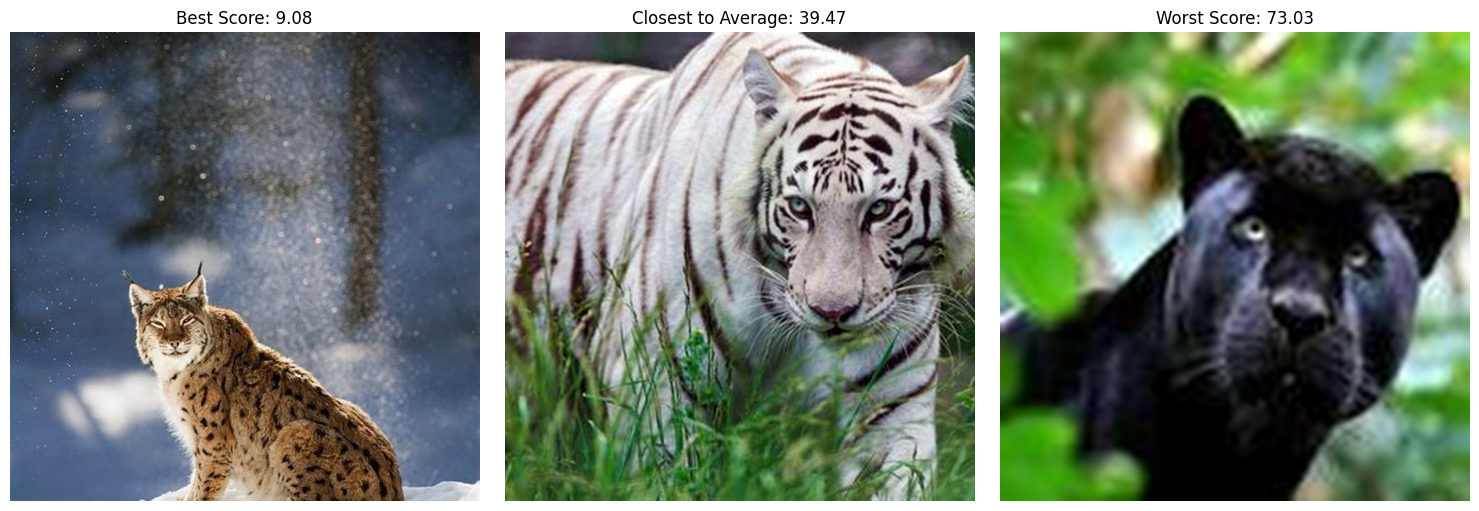

In [ ]:
def plot_best_worst_scores(scores):
  average_score = sum(scores) / len(scores)

  min_score_idx = np.argmin(scores)

  closest_to_avg_idx = np.argmin([abs(score - average_score) for score in scores])

  max_score_idx = np.argmax(scores)

  selected_indices = [min_score_idx, closest_to_avg_idx, max_score_idx]

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  titles = ['Best Score', 'Closest to Average', 'Worst Score']
  for ax, idx, title in zip(axes, selected_indices, titles):
      img_path = random50[idx]
      img = cv2.imread(img_path)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      ax.imshow(img_rgb)
      ax.set_title(f"{title}: {total_scores[idx]:.2f}")
      ax.axis('off')

  plt.tight_layout()
  plt.show()

plot_best_worst_scores(total_scores)

#Enhancement filters

In [ ]:
# Image filters needed for enhancement
# Laplacian filter
def filter2D (image):
  # Creating the kernel(2d convolution matrix)
  kernel1 = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]], dtype=np.float32)

  # Applying the filter2D() function
  return cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

In [ ]:
total_scores = []
image_matrices = []

# Iterate over the random50 images, apply enhancements, and calculate BRISQUE score
for img_new in random50:
    #img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    #img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Enhancement filter
    img_new = filter2D(img_new)

    # add new matrix to the list
    image_matrices.append(img_new)

    # Use the enhanced image for BRISQUE
    obj = BRISQUE()
    score = obj.score(img_new)
    total_scores.append(score)

# Plot new scores using our function
plot_best_worst_scores(total_scores, image_matrices)